In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy

In [15]:
nodes = list(range(5))

# directed graph
H = nx.DiGraph()

# undirected graph
# H = nx.Graph()

In [16]:
H.add_nodes_from(nodes)
H.add_edges_from([
    (1,0),
    (1,2),
    (2,3),
    (3,4),
    (4,0)
])

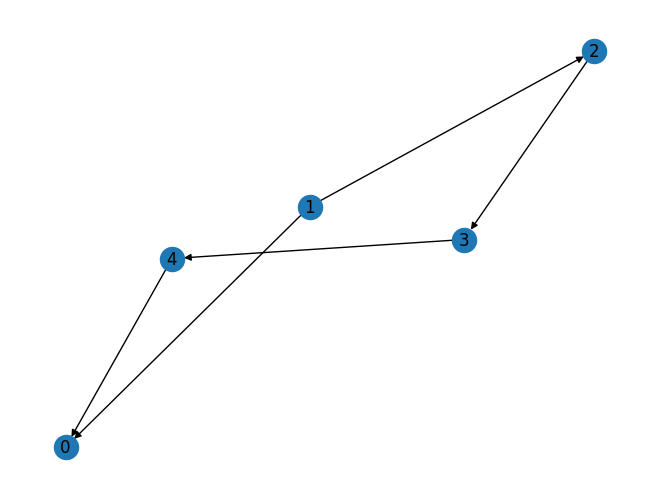

In [17]:
nx.draw(H, with_labels=True)

In [8]:
nx.adjacency_matrix(H).todense()

array([[0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0]])

In [ ]:
degrees = dict(H.degree())

print("Individual degrees:")
for node, degree in degrees.items():
    print(f"Node {node}: Degree {degree}")

sum_of_degrees = sum(degrees)
print(f"\nSum of all degrees: {sum_of_degrees}")



Individual degrees:
Node 0: Degree 2
Node 1: Degree 2
Node 2: Degree 2
Node 3: Degree 2
Node 4: Degree 2
Node 5: Degree 2

Sum of all degrees: 15
